# News Bias analysis notebook
#### Authors: Alexander Lambert, Casey Mathews, and Shivam Patel
#### Githubs: alambe22, cmathew9, and spatel90
## Description: 
The goal of this notebook is to analysze a given set of articles (found in datasets/articles.txt) with known biases and leanings to see if patterns can be determined in their writing. 
We analyze the following parts of the articles:
- Buzzwords and phrases count
- Emotional word count
- Average word length
- Use of words with negative connotations
- Use of words with positive connotations
- Use of words that indicate opinion (I think, I believe, etc.)
- Use of words that indicate fact (We know, research indicates, etc)
- First person pronoun usage (Does the author present this as their perspective, or as information)

Using the data we gather, the hope is to find patterns that could be used to analyze new articles for bias or factuality.
 


In [1]:
#Article class defintion and reading in
class article:
        __slots__ =["link", "bias", "cont", "buzz", "emo", "neg", "pos", "avgLen", 
                    "opi", "fac", "fPro"]
        
        def __init__ (self, link, bias):
            self.link = link
            self.bias = bias
            
articles = []
with open("datasets/articles.txt") as fin:
    for line in fin:
        lineList = line.rstrip().split(" ")
        articles.append(article(lineList[1], lineList[0]))


In [2]:
from bs4 import BeautifulSoup
import requests, re

# Return a list of all words in <img> alt text
def get_alt_text(soup):
    img_elements = soup.find_all("img")
    alt_text_words = []
    for img_element in img_elements:
        if('alt' in img_element):
            img_text = img_element['alt']
            img_text = string_cleaner(img_text)
            img_text = img_text.lower()
            words = list(filter(None, img_text.split(" ")))
            alt_text_words += words
    return alt_text_words

# Clean up a string for splitting on space
def string_cleaner(paragraph):
    # Remove apostrophes from the word
    paragraph = paragraph.replace("'", "")
    paragraph = paragraph.replace("’", "")
    # Replace non-alpha-numeric characters with a space
    paragraph = re.sub('[^A-Za-z]+', ' ', paragraph)
    return paragraph

# Returns a list of all words in an article
def get_article(url):
    # Setup
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # Contains a list of all words from <p> and <li> elements
    article_words = []
    
    # Contains all <p> and <li> elements
    p_li_elements = soup.find_all(["p", "li"])
    for p_li_element in p_li_elements:
        p_li = p_li_element.getText()
        p_li = string_cleaner(p_li)
        # Convert the string to lowercase
        p_li = p_li.lower()
        # Filter out empty strings created by cleaning
        words = list(filter(None, p_li.split(" ")))
        article_words += words
    
    alt_text = get_alt_text(soup)
    article_words += alt_text
    return " ".join(article_words)



In [3]:
def parsePhraseFile(file, phrases):
    with open(file) as fin:
        for line in fin:
            phrases.append(line.strip())

def filterWords(file, words):
    phrases = []
    count = 0
    parsePhraseFile(file, phrases)
    cur_pat = None
    
    for phrase in phrases:
        cur_pat = re.compile(r'\b'+re.escape(phrase)+r'\b')
        count += len(cur_pat.findall(words))
    return count
    
def wordLength(words):
    sum = 0
    wordList = words.split(' ')
    for word in wordList:
        sum = sum + len(word)
    
    return sum/len(wordList)

for article in articles:
    print("Processing article:" + article.link)
    article.cont = get_article(article.link)
    article.buzz = filterWords("./datasets/buzzwords.txt", article.cont)
    article.emo = filterWords("./datasets/emotional_words.txt", article.cont)
    article.neg = filterWords("./datasets/negative-words.txt", article.cont)
    article.pos = filterWords("./datasets/positive-words.txt", article.cont)
    article.avgLen = wordLength(article.cont)
    article.opi = filterWords("./datasets/opinion.txt", article.cont)
    article.fac = filterWords("./datasets/fact_phrases.txt", article.cont)
    article.fPro = filterWords("./datasets/first_person.txt", article.cont)
    print("Processed article:" + article.link +" avg_len: " + str(article.avgLen) + " negative:" + str(article.neg) + " positive:" + str(article.pos))

Processing article:https://abort73.com/abortion/medical_testimony/
Processed article:https://abort73.com/abortion/medical_testimony/ avg_len: 5.12292817679558 negative:144 positive:75
Processing article:https://abort73.com/abortion/prenatal_development/
Processed article:https://abort73.com/abortion/prenatal_development/ avg_len: 5.059965165464046 negative:131 positive:88
Processing article:https://abort73.com/abortion/personhood/
Processed article:https://abort73.com/abortion/personhood/ avg_len: 5.0016880486158 negative:116 positive:69
Processing article:https://abort73.com/abortion/abortion_techniques/
Processed article:https://abort73.com/abortion/abortion_techniques/ avg_len: 5.243549311926605 negative:272 positive:142
Processing article:https://abort73.com/abortion/abortion_pictures/
Processed article:https://abort73.com/abortion/abortion_pictures/ avg_len: 4.894683372841178 negative:156 positive:67
Processing article:https://www.academia.org/oops-government-agency-allegedly-lost

Processed article:https://www.12news.com/article/news/crime/phoenix-pd-releases-body-cam-video-from-police-shooting-that-hospitalized-suspect/75-475cb0e7-f3a4-44ca-8b7c-ec0577269e50 avg_len: 4.984285714285714 negative:13 positive:6
Processing article:https://www.12news.com/article/news/nation-world/dueling-town-halls-for-trump-biden-after-debate-plan-nixed/507-18433a0c-34c0-499a-b58e-4ce689b5476a
Processed article:https://www.12news.com/article/news/nation-world/dueling-town-halls-for-trump-biden-after-debate-plan-nixed/507-18433a0c-34c0-499a-b58e-4ce689b5476a avg_len: 4.900307272106521 negative:102 positive:120
Processing article:https://www.12news.com/article/news/nation-world/us-jobless-report-october-15/507-a77b846c-59b4-4aa9-91f2-539b13c9c2b7
Processed article:https://www.12news.com/article/news/nation-world/us-jobless-report-october-15/507-a77b846c-59b4-4aa9-91f2-539b13c9c2b7 avg_len: 5.112508735150245 negative:47 positive:39
Processing article:https://www.9news.com/article/news/

Processed article:https://www.act.tv/latest-news1/the-people-the-pandemic-forgot avg_len: 4.415993537964459 negative:38 positive:31
Processing article:https://www.act.tv/latest-news1/save-lives-and-unionize
Processed article:https://www.act.tv/latest-news1/save-lives-and-unionize avg_len: 4.890977443609023 negative:14 positive:20
Processing article:https://achnews.org/2020/06/03/a-100-year-old-rhododendron-and-the-woman-who-grew-up-watching-the-plant-grow/
Processed article:https://achnews.org/2020/06/03/a-100-year-old-rhododendron-and-the-woman-who-grew-up-watching-the-plant-grow/ avg_len: 5.238095238095238 negative:1 positive:1
Processing article:https://achnews.org/2020/05/26/this-fatherless-man-made-an-instructional-youtube-channel-for-kids-without-dads/
Processed article:https://achnews.org/2020/05/26/this-fatherless-man-made-an-instructional-youtube-channel-for-kids-without-dads/ avg_len: 5.238095238095238 negative:1 positive:1
Processing article:https://achnews.org/2020/05/23/wh

Processed article:https://www.healthyfoodhouse.com/science-explains-what-happens-to-your-body-when-you-drink-lemon-water-with-turmeric-every-day/ avg_len: 5.1726078799249535 negative:26 positive:26
Processing article:https://www.healthyfoodhouse.com/diy-honey-wraps-to-cure-cough-and-eliminate-mucus-from-the-lungs/
Processed article:https://www.healthyfoodhouse.com/diy-honey-wraps-to-cure-cough-and-eliminate-mucus-from-the-lungs/ avg_len: 4.989451476793249 negative:22 positive:20
Processing article:https://www.healthyfoodhouse.com/breakfast-removes-cholesterol-blood-sugar-and-weight/
Processed article:https://www.healthyfoodhouse.com/breakfast-removes-cholesterol-blood-sugar-and-weight/ avg_len: 4.974729241877256 negative:19 positive:24
Processing article:https://www.discovermagazine.com/technology/5g-has-arrived-what-is-it-and-how-does-it-work
Processed article:https://www.discovermagazine.com/technology/5g-has-arrived-what-is-it-and-how-does-it-work avg_len: 4.551374819102749 negative

In [4]:
#iterate through articles and store results for each attribute per bias section
import math

right = []
rightCenter = []
center = []
left = []
leftCenter = []
conspiracy = []
factual = []
def storeResults (biasData, biasName):
    size=0
    buzzSum, emoSum, negSum, posSum, avgLenSum, opiSum, facSum, fProSum = 0,0,0,0,0,0,0,0
    for article in articles:
        if(article.bias == biasName): 
            size+=1
            buzzSum += article.buzz
            emoSum += article.emo
            negSum += article.neg
            posSum += article.pos
            avgLenSum += article.avgLen
            opiSum += article.opi
            facSum += article.fac
            fProSum += article.fPro
    biasData.append(round(buzzSum/size))
    biasData.append(round(emoSum/size))
    biasData.append(round(negSum/size))
    biasData.append(round(posSum/size))
    biasData.append(round(avgLenSum/size,2))
    biasData.append(round(opiSum/size))
    biasData.append(round(facSum/size))
    biasData.append(round(fProSum/size))
    
    return biasData
        

In [5]:
#store results for each bias
left = storeResults(left,"Left")
leftCenter = storeResults(leftCenter,"Left-Center")
center = storeResults(center,"Center")
rightCenter = storeResults(rightCenter,"Right-Center")
right = storeResults(right,"Right")
conspiracy= storeResults(conspiracy,"Conspiracy")
factual = storeResults(factual,"Factual")



In [6]:
print(left)
print(leftCenter)
print(center)
print(rightCenter)
print(right)
print(conspiracy)
print(factual)

[0, 46, 12, 14, 4.92, 7, 0, 8]
[2, 106, 35, 27, 5.07, 15, 0, 10]
[1, 102, 26, 30, 4.92, 9, 0, 7]
[1, 49, 10, 11, 5.0, 8, 0, 4]
[3, 170, 86, 52, 5.21, 34, 0, 13]
[1, 195, 82, 63, 5.1, 24, 0, 41]
[1, 123, 39, 37, 5.05, 19, 0, 11]


Text(0.5, 1.0, 'Buzz Words Usage')

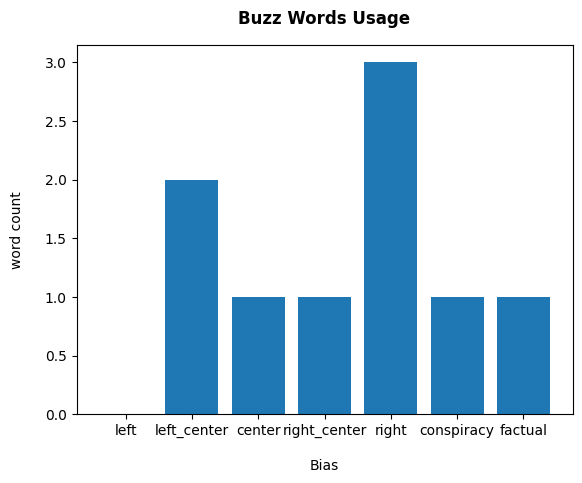

In [7]:
#Buzz Words
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[0], leftCenter[0], center[0], rightCenter[0], right[0], conspiracy[0], factual[0]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Buzz Words Usage', pad=15, weight = 'bold')

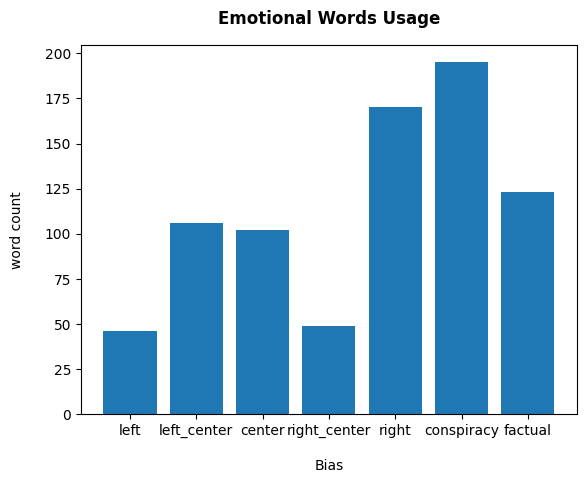

In [8]:
#Emotional Words

objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[1], leftCenter[1], center[1], rightCenter[1], right[1], conspiracy[1], factual[1]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Emotional Words Usage', pad=15, weight = 'bold')

plt.show()


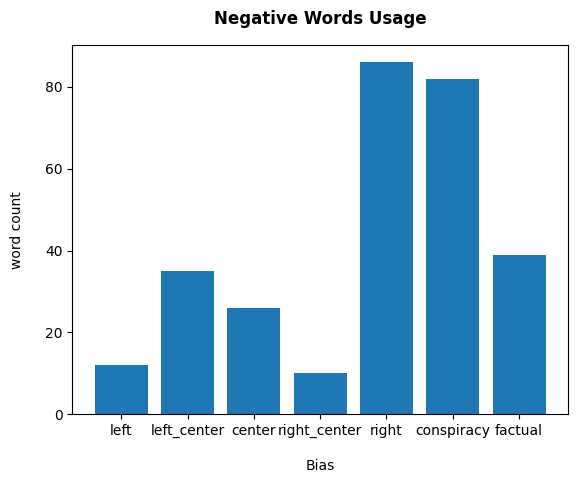

In [9]:
#Negative Words

objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[2], leftCenter[2], center[2], rightCenter[2], right[2], conspiracy[2], factual[2]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Negative Words Usage', pad=15, weight = 'bold')

plt.show()


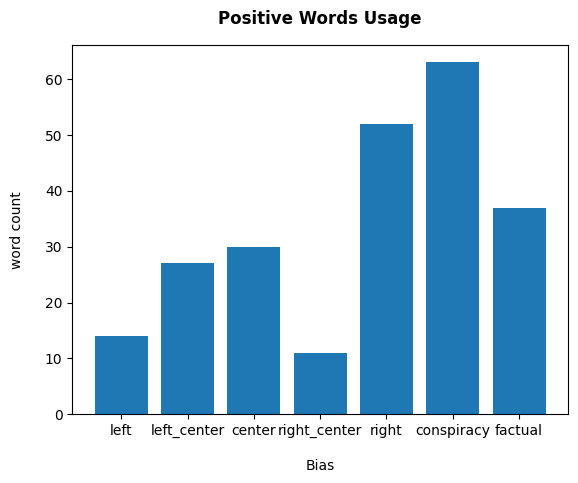

In [10]:
#Postive Words

objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[3], leftCenter[3], center[3], rightCenter[3], right[3], conspiracy[3], factual[3]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Positive Words Usage', pad=15, weight = 'bold')

plt.show()

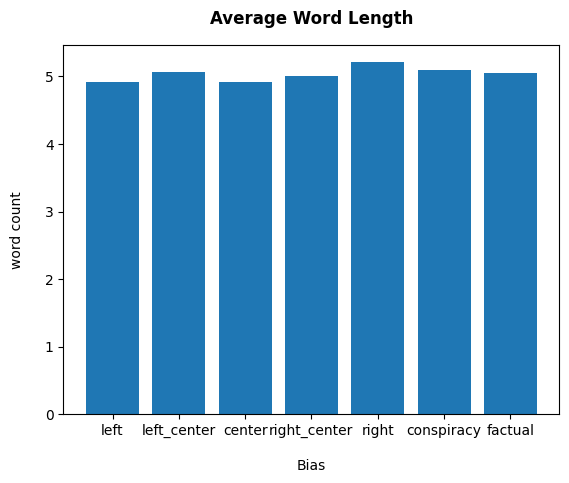

In [11]:
#average Word Length

objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[4], leftCenter[4], center[4], rightCenter[4], right[4], conspiracy[4], factual[4]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Average Word Length', pad=15, weight = 'bold')

plt.show()

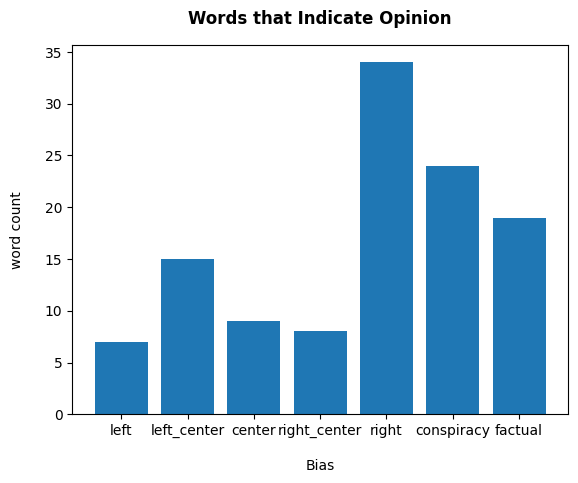

In [12]:
#Opinionated Words
objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[5], leftCenter[5], center[5], rightCenter[5], right[5], conspiracy[5], factual[5]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('Words that Indicate Opinion', pad=15, weight = 'bold')

plt.show()

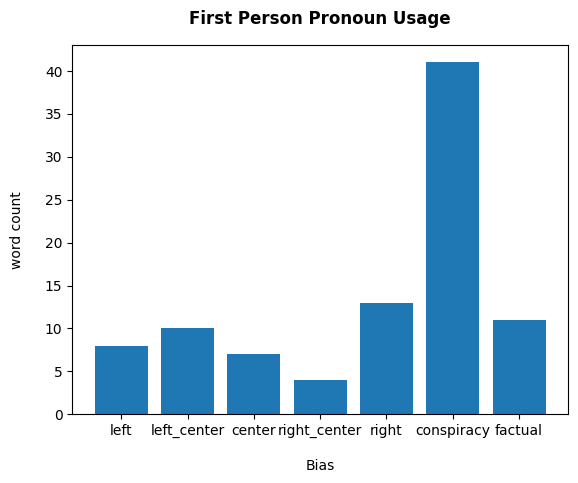

In [13]:
#Opinionated Words
objects = ('left', 'left_center', 'center', 'right_center', 'right', 'conspiracy' , 'factual')
y_pos = np.arange(len(objects))
performance = [left[7], leftCenter[7], center[7], rightCenter[7], right[7], conspiracy[7], factual[7]]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('word count', labelpad=15)
plt.xlabel('Bias', labelpad=15)
plt.title('First Person Pronoun Usage', pad=15, weight = 'bold')

plt.show()